In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load your data
df = pd.read_excel('data11.xlsx', index_col='Date')

# Ensure datetime index
df.index = pd.to_datetime(df.index)

# Display the first few rows of the DataFrame
print(df.head())


            BASEL_temp_mean
Date                       
2000-01-01              2.9
2000-01-02              3.6
2000-01-03              2.2
2000-01-04              3.9
2000-01-05              6.0


In [ ]:
# Split the data into train and test sets (80:20)
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Check the shape of train and test sets
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)


Train data shape: (2923, 1)
Test data shape: (731, 1)


In [ ]:
# Define the lag order (number of past observations to consider)
lag = 2  # Adjust this value based on your data and desired model complexity

# Fit Autoregressive (AR) model
model = AutoReg(train_data['BASEL_temp_mean'], lags=lag)
model_fit = model.fit()

# Display model summary
print(model_fit.summary())


                            AutoReg Model Results                             
Dep. Variable:        BASEL_temp_mean   No. Observations:                 2923
Model:                     AutoReg(2)   Log Likelihood               -6388.074
Method:               Conditional MLE   S.D. of innovations              2.155
Date:                Thu, 25 Apr 2024   AIC                          12784.148
Time:                        13:48:00   BIC                          12808.067
Sample:                    01-03-2000   HQIC                         12792.764
                         - 01-01-2008                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5222      0.072      7.253      0.000       0.381       0.663
BASEL_temp_mean.L1     1.0494      0.018     56.978      0.000       1.013       1.086
BASEL_temp_mean.L2  

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


Root Mean Squared Error (RMSE): 7.202952502548494


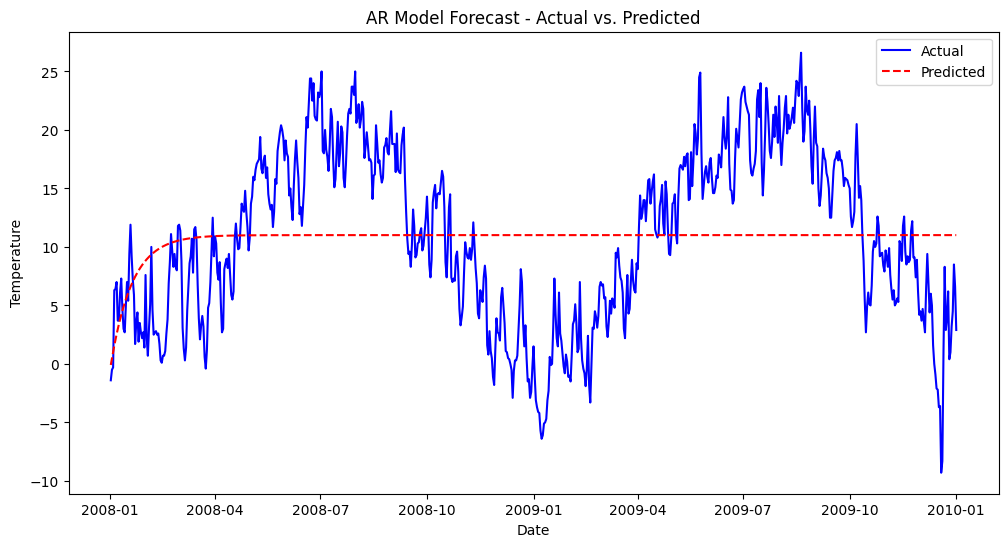

In [ ]:
# Make predictions on the test set
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

# Calculate RMSE (Root Mean Squared Error)
rmse = sqrt(mean_squared_error(test_data['BASEL_temp_mean'], predictions))
print("Root Mean Squared Error (RMSE):", rmse)

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['BASEL_temp_mean'], label='Actual', color='blue')
plt.plot(test_data.index, predictions, label='Predicted', color='red', linestyle='--')
plt.title('AR Model Forecast - Actual vs. Predicted')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


In [ ]:
# Define the order of the Moving Average (MA) model (e.g., MA(q) with q=1)
q = 2  # Adjust this value based on your data and desired model complexity
from statsmodels.tsa.arima.model import ARIMA
# Fit Moving Average (MA) model
model = ARIMA(train_data['BASEL_temp_mean'], order=(0, 0, q))
model_fit = model.fit()

# Display model summary
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:        BASEL_temp_mean   No. Observations:                 2923
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -7651.493
Date:                Thu, 25 Apr 2024   AIC                          15310.985
Time:                        14:17:01   BIC                          15334.907
Sample:                    01-01-2000   HQIC                         15319.601
                         - 01-01-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0252      0.175     63.060      0.000      10.683      11.368
ma.L1          1.1751      0.014     83.811      0.000       1.148       1.203
ma.L2          0.6417      0.014     46.435      0.0

Root Mean Squared Error (RMSE): 7.339220435828841


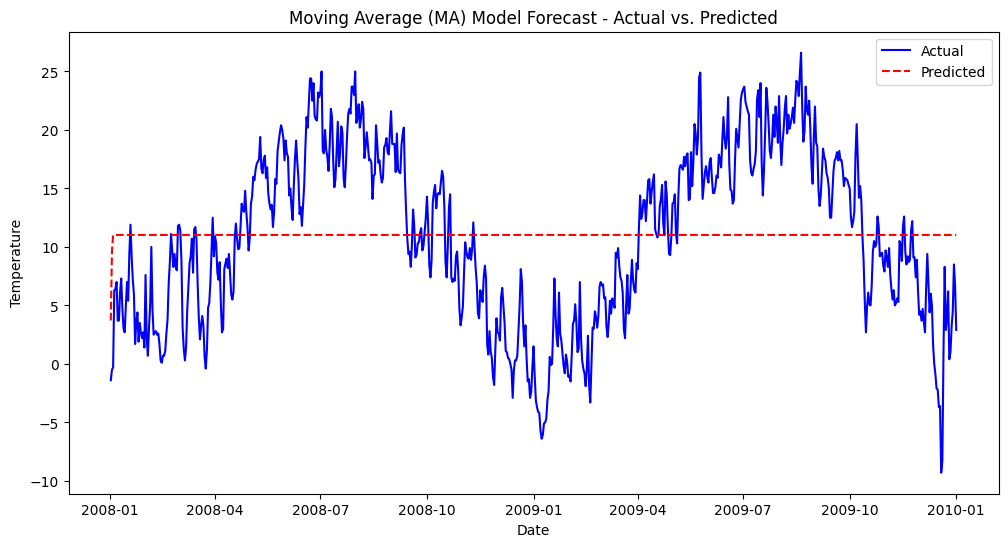

In [ ]:
# Make predictions on the test set
predictions = model_fit.forecast(steps=len(test_data))

# Calculate RMSE (Root Mean Squared Error)
rmse = sqrt(mean_squared_error(test_data['BASEL_temp_mean'], predictions))
print("Root Mean Squared Error (RMSE):", rmse)

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['BASEL_temp_mean'], label='Actual', color='blue')
plt.plot(test_data.index, predictions, label='Predicted', color='red', linestyle='--')
plt.title('Moving Average (MA) Model Forecast - Actual vs. Predicted')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()# Make predictions on the test set
predictions = model_fit.forecast(steps=len(test_data))

# Calculate RMSE (Root Mean Squared Error)
rmse = sqrt(mean_squared_error(test_data['BASEL_temp_mean'], predictions))
print("Root Mean Squared Error (RMSE):", rmse)

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['BASEL_temp_mean'], label='Actual', color='blue')
plt.plot(test_data.index, predictions, label='Predicted', color='red', linestyle='--')
plt.title('Moving Average (MA) Model Forecast - Actual vs. Predicted')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


In [ ]:
model = ARIMA(train_data['BASEL_temp_mean'], order=(1, 0, 3))
model_fit = model.fit()
# Display model summary
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:        BASEL_temp_mean   No. Observations:                 2923
Model:                 ARIMA(1, 0, 3)   Log Likelihood               -6346.828
Date:                Thu, 25 Apr 2024   AIC                          12705.655
Time:                        14:25:44   BIC                          12741.537
Sample:                    01-01-2000   HQIC                         12718.579
                         - 01-01-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7498      1.282      8.383      0.000       8.237      13.263
ar.L1          0.9786      0.004    227.168      0.000       0.970       0.987
ma.L1          0.0380      0.017      2.187      0.0

Root Mean Squared Error (RMSE): 7.155515272965801


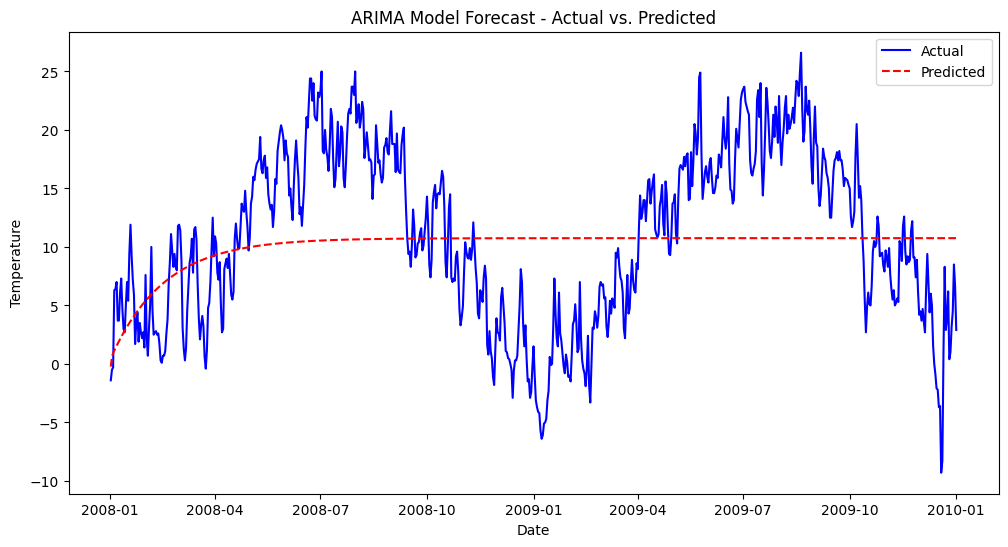

In [ ]:
# Make predictions on the test set
predictions = model_fit.forecast(steps=len(test_data))

# Calculate RMSE (Root Mean Squared Error)
rmse = sqrt(mean_squared_error(test_data['BASEL_temp_mean'], predictions))
print("Root Mean Squared Error (RMSE):", rmse)

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['BASEL_temp_mean'], label='Actual', color='blue')
plt.plot(test_data.index, predictions, label='Predicted', color='red', linestyle='--')
plt.title('ARIMA Model Forecast - Actual vs. Predicted')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


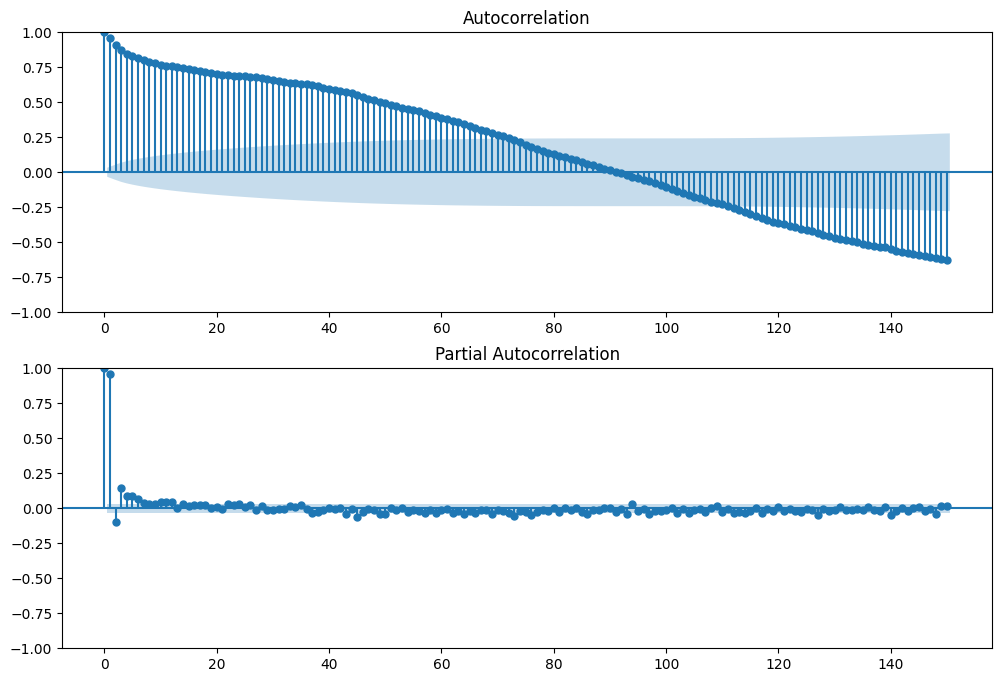

In [ ]:
# Plot ACF and PACF to determine parameters for SARIMAX
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['BASEL_temp_mean'], lags=150, ax=ax1)
plot_pacf(df['BASEL_temp_mean'], lags=150, ax=ax2)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


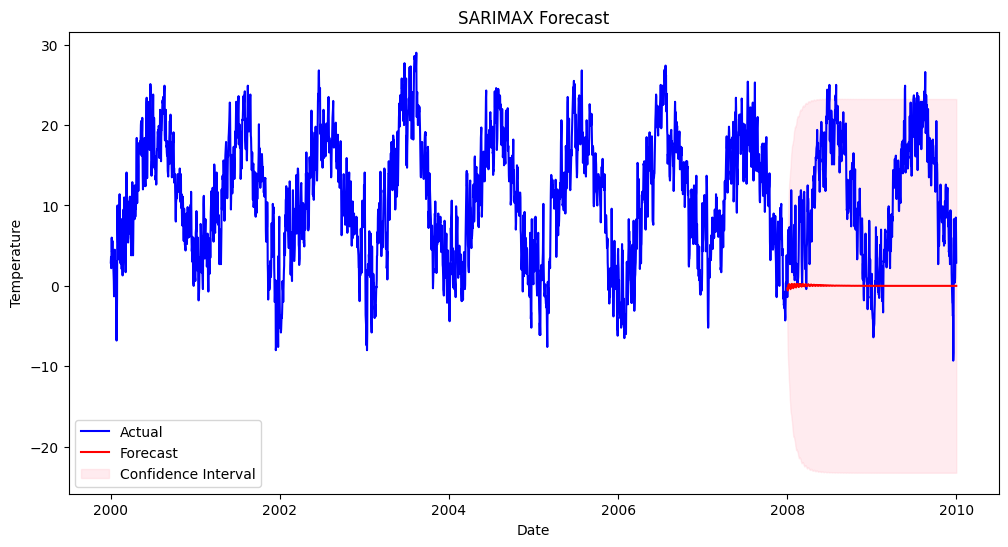

Root Mean Squared Error (RMSE): 13.21


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error


# Split data into train and test sets (80% train, 20% test)
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Define SARIMAX model parameters (example values, adjust as needed)
order = (2, 0, 1)             # (p, d, q) for non-seasonal components
seasonal_order = (2, 0, 1, 12) # (P, D, Q, seasonal_period) for seasonal components

# Fit SARIMAX model to the training data
model = SARIMAX(train_data['BASEL_temp_mean'], order=order, seasonal_order=seasonal_order)
results = model.fit()

# Forecast on the test data
forecast = results.get_forecast(steps=len(test_data))

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot actual vs. forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['BASEL_temp_mean'], label='Actual', color='blue')
plt.plot(test_data.index, forecast_values, label='Forecast', color='red')
plt.fill_between(test_data.index, confidence_intervals['lower BASEL_temp_mean'], confidence_intervals['upper BASEL_temp_mean'], color='pink', alpha=0.3, label='Confidence Interval')
plt.title('SARIMAX Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Calculate RMSE for the forecast
actual_values = test_data['BASEL_temp_mean']
rmse = np.sqrt(mean_squared_error(actual_values, forecast_values))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Root Mean Squared Error (RMSE): 2.03


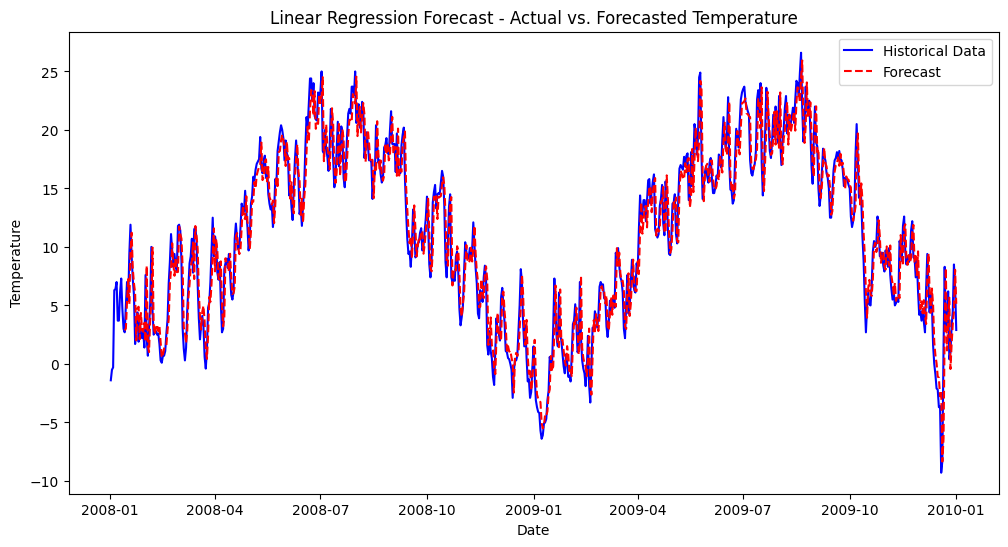

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your dataset (assuming 'data11.xlsx' contains your temperature data)
df = pd.read_excel('data11.xlsx', parse_dates=['Date'], index_col='Date')

# Split data into training (80%) and testing (20%) sets
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Function to create lagged features for time series data
def create_lagged_features(data, lag=12):
    """
    Create lagged features (X) and target (y) for linear regression modeling.
    """
    lagged_data = data.copy()
    for i in range(1, lag+1):
        lagged_data[f't-{i}'] = data['BASEL_temp_mean'].shift(i)
    lagged_data.dropna(inplace=True)
    return lagged_data

# Define the number of lagged features (adjust as needed)
lag = 12

# Create lagged features and target for training data
lagged_train_data = create_lagged_features(train_data, lag=lag)
X_train = lagged_train_data.drop('BASEL_temp_mean', axis=1)
y_train = lagged_train_data['BASEL_temp_mean']

# Create lagged features and target for testing data
lagged_test_data = create_lagged_features(test_data, lag=lag)
X_test = lagged_test_data.drop('BASEL_temp_mean', axis=1)
y_test = lagged_test_data['BASEL_temp_mean']

# Fit linear regression model using the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Forecast future values using the trained linear regression model
forecast_values = model.predict(X_test)

# Calculate RMSE for the forecast
rmse = np.sqrt(mean_squared_error(y_test, forecast_values))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plotting actual vs. forecasted values
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Historical Data', color='blue')

# Ensure forecast_values aligns with test_data.index
forecast_dates = lagged_test_data.index  # Use index of lagged_test_data
plt.plot(forecast_dates, forecast_values[:len(forecast_dates)], label='Forecast', color='red', linestyle='--')

plt.title('Linear Regression Forecast - Actual vs. Forecasted Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()
